<a href="https://colab.research.google.com/github/Tiamiyu1/Covid-19-Tweet-Sentiment-Analysis/blob/main/Covid-19%20tweet%20sentiment%20analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading data

In [ ]:
# Importing Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# loading dataset
train = pd.read_csv("/content/drive/My Drive/Corona_NLP_train.csv", encoding = "ISO-8859-1")
test = pd.read_csv("/content/drive/MyDrive/Corona_NLP_test.csv") 

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       3798 non-null   int64 
 1   ScreenName     3798 non-null   int64 
 2   Location       2964 non-null   object
 3   TweetAt        3798 non-null   object
 4   OriginalTweet  3798 non-null   object
 5   Sentiment      3798 non-null   object
dtypes: int64(2), object(4)
memory usage: 178.2+ KB


In [ ]:
train.shape, test.shape

((41157, 6), (3798, 6))

In [ ]:
# check first few rows
train.head()

UserName  ...           Sentiment
0      3799  ...             Neutral
1      3800  ...            Positive
2      3801  ...            Positive
3      3802  ...            Positive
4      3803  ...  Extremely Negative

[5 rows x 6 columns]

In [ ]:
test.head()

UserName  ...           Sentiment
0         1  ...  Extremely Negative
1         2  ...            Positive
2         3  ...  Extremely Positive
3         4  ...            Negative
4         5  ...             Neutral

[5 rows x 6 columns]

## Cleaning and preparation

In [ ]:
# combine the two datasets for easy cleaning
sets = [train, test]
df = pd.concat(sets)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44955 entries, 0 to 3797
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       44955 non-null  int64 
 1   ScreenName     44955 non-null  int64 
 2   Location       35531 non-null  object
 3   TweetAt        44955 non-null  object
 4   OriginalTweet  44955 non-null  object
 5   Sentiment      44955 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.4+ MB


In [ ]:
# only Location has missing values

In [ ]:
# replace the location NAN with 'unknown'
df['Location'].replace(np.nan, 'unknown', inplace=True)

In [ ]:
# Check again to be sure
df.isnull().sum()

UserName         0
ScreenName       0
Location         0
TweetAt          0
OriginalTweet    0
Sentiment        0
dtype: int64

In [ ]:
# No null values

In [ ]:
# check duplicate values
df.duplicated().any()

False

No duplicate values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44955 entries, 0 to 3797
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       44955 non-null  int64 
 1   ScreenName     44955 non-null  int64 
 2   Location       44955 non-null  object
 3   TweetAt        44955 non-null  object
 4   OriginalTweet  44955 non-null  object
 5   Sentiment      44955 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.4+ MB


## visualizations and statistical analysis

In [ ]:
df .Sentiment.value_counts()

Positive              12369
Negative              10958
Neutral                8332
Extremely Positive     7223
Extremely Negative     6073
Name: Sentiment, dtype: int64

In [ ]:
# grouping the setiments into 3 main groups

In [ ]:
df['Sentiment'].replace({'Extremely Positive': 'Positive', 'Extremely Negative':'Negative'}, inplace=True)

In [ ]:
df .Sentiment.value_counts()

Positive    19592
Negative    17031
Neutral      8332
Name: Sentiment, dtype: int64

In [ ]:
df['Location'].nunique()

13138

There are 13138 unique tweet locations

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


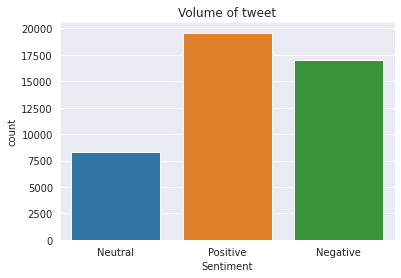

In [ ]:
sns.countplot(df.Sentiment).set_title('Volume of tweet');

In [ ]:
df.Sentiment.value_counts()

Positive    19592
Negative    17031
Neutral      8332
Name: Sentiment, dtype: int64

In [ ]:
# colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#ff5645']
# explode = (0.05,0.05,0.05) 
# plt.pie(df.Sentiment.value_counts(), colors = colors, labels=['Positive', 'Negative', 'Neutral'],
#         autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)

# centreCircle = plt.Circle((0,0),0.70,fc='white')
# fig = plt.gcf()
# fig.gca().add_artist(centreCircle)
# plt.tight_layout()
# plt.show()

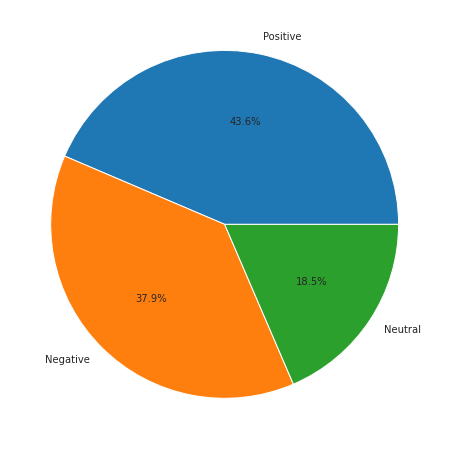

In [ ]:
# pie plot
fig = plt.figure(figsize=(10,8))
plt.pie(df.Sentiment.value_counts(),  labels=['Positive', 'Negative', 'Neutral'] ,autopct='%1.1f%%')
plt.show()

- The positive column accounts for 43.6% of the total data
- The Negative column accounts for 37.9% of the total data
- The Neutral column accounts for 18.5% of the total data

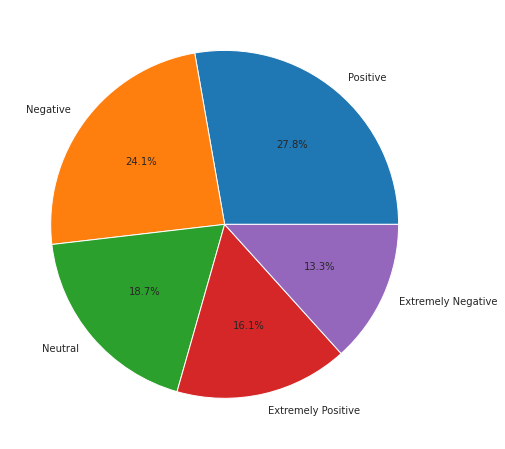

In [ ]:
# pie plot
fig = plt.figure(figsize=(10,8))
plt.pie(train.Sentiment.value_counts(),  labels=train.Sentiment.value_counts().index ,autopct='%1.1f%%')
plt.show()

In [ ]:
# train['TweetAt'].unique()

~The tweets were tweeted between the month of March and April, 2020~

In [ ]:
df['Location'].value_counts()

unknown                  9424
United States             603
London, England           568
London                    565
New York, NY              429
                         ... 
Dublin City Centre          1
NEW YORK CITY               1
Saginaw, TX                 1
RayÂs Boom Boom Room       1
North Andover, MA           1
Name: Location, Length: 13138, dtype: int64

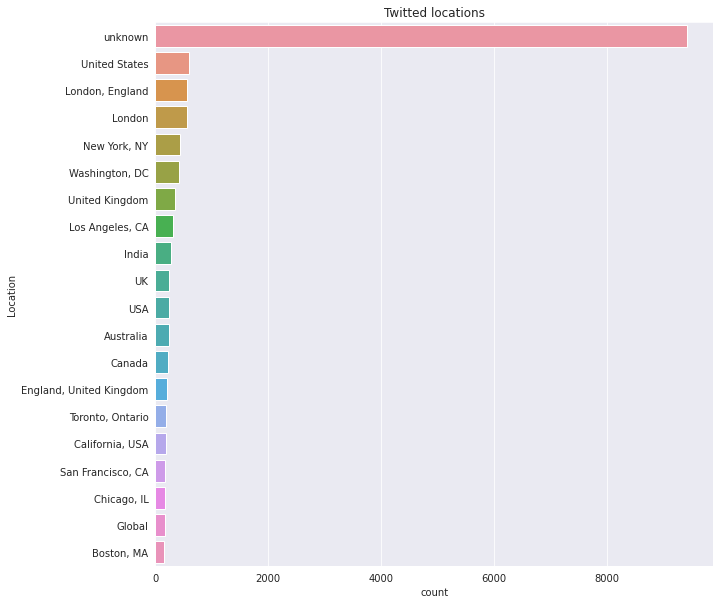

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(y='Location', data=df, order=df.Location.value_counts().iloc[0:20].index).set_title("Twitted locations");

Majority of the tweets are from unknown Locations, followed by United States; London, England; and London

## Dealing with datetime

### Feature Engineering

In [ ]:
from datetime import datetime as dt

In [ ]:
df['TweetAt'] = pd.to_datetime(df['TweetAt'])

In [ ]:
df.sample(20)

UserName  ...  Sentiment
24328     28127  ...   Negative
16977     20776  ...   Negative
26123     29922  ...   Negative
34155     37954  ...   Positive
4407       8206  ...    Neutral
33064     36863  ...   Positive
23436     27235  ...   Negative
11879     15678  ...   Positive
29021     32820  ...   Negative
12501     16300  ...   Positive
35760     39559  ...   Negative
15195     18994  ...   Positive
34993     38792  ...    Neutral
28381     32180  ...    Neutral
18953     22752  ...   Negative
96           97  ...    Neutral
135        3934  ...   Negative
4792       8591  ...   Negative
1285       5084  ...   Positive
5417       9216  ...   Positive

[20 rows x 6 columns]

In [ ]:
# new month column
df['Month'] = df['TweetAt'].dt.month

In [ ]:
df['Month'].value_counts()

3     29151
4      2487
8      1890
7      1850
6      1744
12     1488
9      1487
5      1137
11     1074
10     1059
2       958
1       630
Name: Month, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


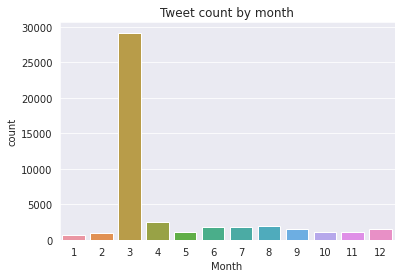

In [ ]:
sns.countplot(df['Month']).set_title('Tweet count by month');

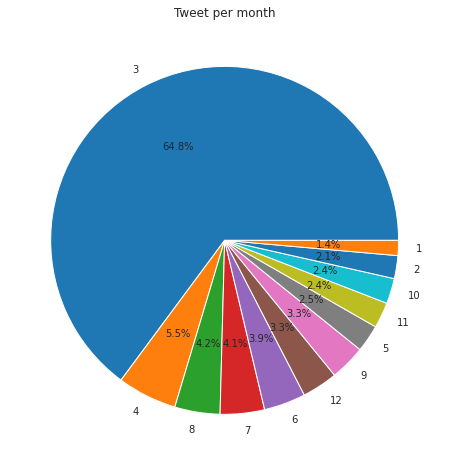

In [ ]:
# pie plot
fig = plt.figure(figsize=(10,8))
plt.pie(df.Month.value_counts(),  labels=df.Month.value_counts().index, autopct='%1.1f%%')
plt.title('Tweet per month')
plt.show()

64.8% of the tweets come in March, 2020 when the Outbreak was at its peak

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


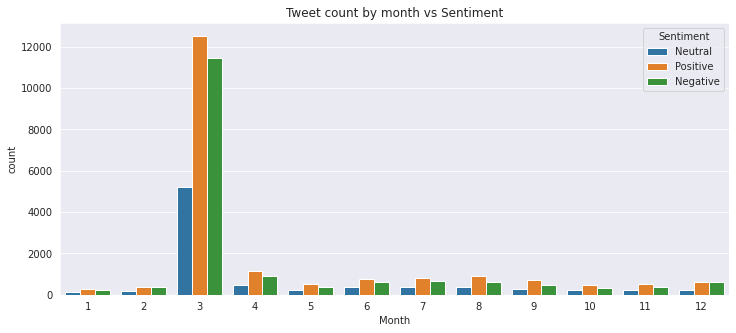

In [ ]:
fig = plt.figure(figsize=(12,5))
sns.countplot(df['Month'], hue=df['Sentiment']).set_title('Tweet count by month vs Sentiment');

In every month, we have more positive sentiments than any other sentimental type

In [ ]:
# new day column
df['Day'] = df['TweetAt'].dt.day

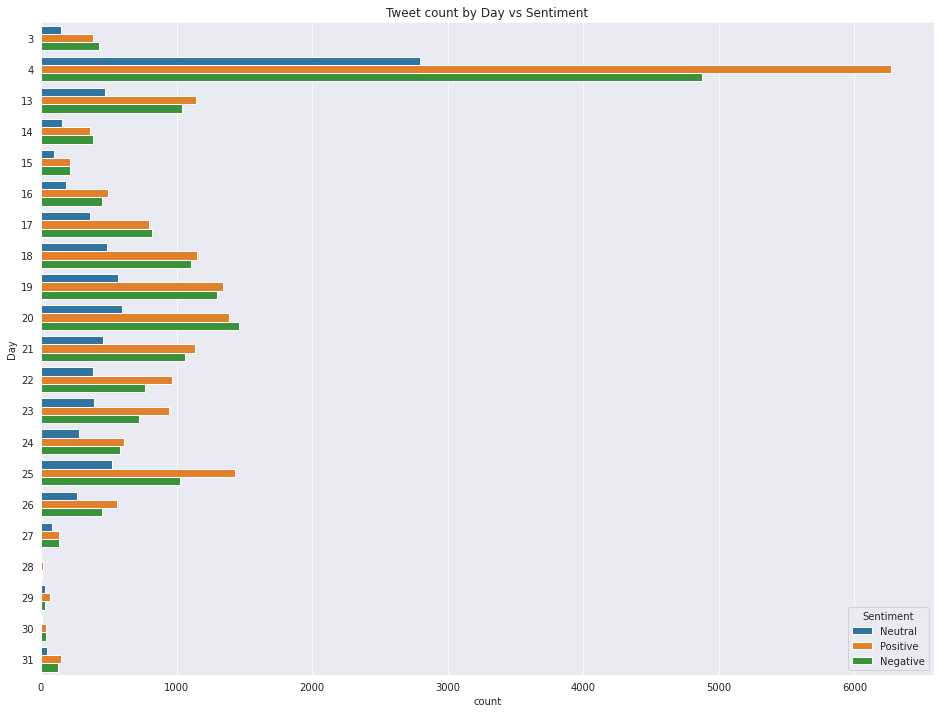

In [ ]:
fig = plt.figure(figsize=(16,12))
sns.countplot(y = df['Day'], hue=df['Sentiment']).set_title('Tweet count by Day vs Sentiment');

## Wordcloud!

In [ ]:
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
%matplotlib inline

In [ ]:
def one_sentence(data):
    msg=' '.join(data)
    return msg
def join_all(data):
    msg = " "
    for i in data:
        msg = msg + i
    return msg

In [ ]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
WNL=WordNetLemmatizer()
def text_process(data):
    msg=[c for c in data if c not in string.punctuation]
    msg=''.join(msg)
    msg=[word for word in msg.split() if word.lower() not in stopwords.words('english')]
    msg=[WNL.lemmatize(word) for word in msg]
    return msg

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
import nltk
nltk.download('stopwords')
full_data=df['OriginalTweet'].apply(text_process).apply(one_sentence)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
whole=join_all(full_data)

In [ ]:
whole

' MeNyrbie PhilGahan Chrisitv httpstcoiFz9FAn2Pa httpstcoxX6ghGFzCC httpstcoI2NlzdxNo8advice Talk neighbour family exchange phone number create contact list phone number neighbour school employer chemist GP set online shopping account po adequate supply regular med orderCoronavirus Australia Woolworths give elderly disabled dedicated shopping hour amid COVID19 outbreak httpstcobInCA9Vp8Pfood stock one empty PLEASE dont panic ENOUGH FOOD EVERYONE take need Stay calm stay safe COVID19france COVID19 COVID19 coronavirus confinement Confinementotal ConfinementGeneral httpstcozrlG0Z520jready go supermarket COVID19 outbreak Im paranoid food stock litteraly empty coronavirus serious thing please dont panic cause shortage CoronavirusFrance restezchezvous StayAtHome confinement httpstcousmuaLq72nnews regionÂ\x92s first confirmed COVID19 case came Sullivan County last week people flocked area store purchase cleaning supply hand sanitizer food toilet paper good TimDodson report httpstcocfXch7a2lUC

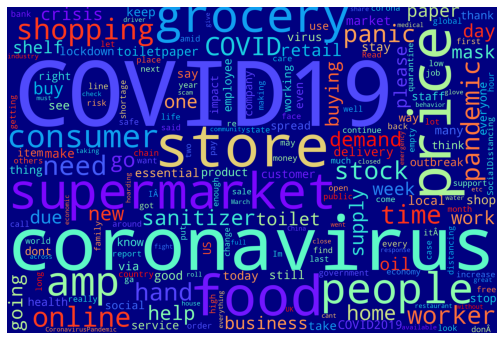

In [ ]:
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(10, 6))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");


from wordcloud import WordCloud, STOPWORDS
# plt.figure(figsize=(8,))
# Generate wordcloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='navy', colormap='rainbow', collocations=False, stopwords = STOPWORDS).generate(whole)
# Plot
plot_cloud(wordcloud)

# Most frequently used words
- Coronavirus
- grocery store
- COVID19
- supermarket
- amp
- price
- hand
- sanitizer
- covid
- people
- store
- consumer
- help
- worker
- supply
- time
- need
- online 
- shopping
- food
- day
- etc

## Insights

- The tweet were all tweeted in 2020 between january and December
- 64.8% of the tweets come in March, 2020 when the Outbreak was at its peak
- In every month, we have more positive sentiments than any other sentimental type
- ~The tweets were tweeted between the month of March and April,2020~
- The positive column accounts for 43.6% of the total data
- The Negative column accounts for 37.9% of the total data
- The Neutral column accounts for 18.5% of the total data
- Majority of the tweets are from unknown Locations, followed by United States; London, England; and London

## Modeling

### 1 - Logistic Regression

In [ ]:
#getting back the train and test sets after cleaning
trainn = df[:41157]
testt = df[41157:]

In [ ]:
# vectorizer:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix = vectorizer.fit_transform(trainn['OriginalTweet'])
test_matrix = vectorizer.transform(testt['OriginalTweet'])

In [ ]:
X_train1 = train_matrix
X_test1 = test_matrix
#y_train = train['sentiment']
#y_test = test['sentiment']

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

lab = trainn['Sentiment']
y_train1 = le.fit_transform(lab)
y_test1 = le.fit_transform(testt['Sentiment'])

In [ ]:
#The model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=10000)

In [ ]:
#Training the model
lr.fit(X_train1,y_train1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#Make predictions
predictions1 = lr.predict(X_test1)

In [ ]:
print(predictions1[:10])

[1 2 2 0 1 1 2 0 0 2]


In [ ]:
#Show the results of the predictions
lab_names = testt['Sentiment'].unique()
lab_names[predictions1[:10]]

array(['Positive', 'Neutral', 'Neutral', 'Negative', 'Positive',
       'Positive', 'Neutral', 'Negative', 'Negative', 'Neutral'],
      dtype=object)

In [ ]:
# find accuracy, precision, recall:
from sklearn.metrics import confusion_matrix,classification_report
new = np.asarray(y_test1)
confusion_matrix(predictions1,y_test1)

array([[1341,   89,  150],
       [  99,  444,   64],
       [ 193,   86, 1332]])

In [ ]:
print(classification_report(predictions1,y_test1))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83      1580
           1       0.72      0.73      0.72       607
           2       0.86      0.83      0.84      1611

    accuracy                           0.82      3798
   macro avg       0.80      0.80      0.80      3798
weighted avg       0.82      0.82      0.82      3798



### 2 - LSTM

In [ ]:
corpus = df['OriginalTweet']

In [ ]:
corpus

0       @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...
1       advice Talk to your neighbours family to excha...
2       Coronavirus Australia: Woolworths to give elde...
3       My food stock is not the only one which is emp...
4       Me, ready to go at supermarket during the #COV...
                              ...                        
3793    Meanwhile In A Supermarket in Israel -- People...
3794    Did you panic buy a lot of non-perishable item...
3795    Asst Prof of Economics @cconces was on @NBCPhi...
3796    Gov need to do somethings instead of biar je r...
3797    I and @ForestandPaper members are committed to...
Name: OriginalTweet, Length: 44955, dtype: object

In [ ]:
#One-Hot Encoding of the labels
sentiment = pd.get_dummies(df['Sentiment'])
print(sentiment)

      Negative  Neutral  Positive
0            0        1         0
1            0        0         1
2            0        0         1
3            0        0         1
4            1        0         0
...        ...      ...       ...
3793         0        0         1
3794         1        0         0
3795         0        1         0
3796         1        0         0
3797         0        0         1

[44955 rows x 3 columns]


In [ ]:
len(corpus), len(sentiment)

(44955, 44955)

Both have same length

In [ ]:
#Words Tokenization
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

all_words = []
for sent in corpus:
    tokenize_word = word_tokenize(sent)
    for word in tokenize_word:
        all_words.append(word)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
#Extract each word while avoidng duplicate values
unique_words = set(all_words)
print(len(unique_words))

108246


In [ ]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing.text import Tokenizer

In [ ]:
vocab_length = 101948
embedded_sentences = [one_hot(sent, vocab_length) for sent in corpus]
#print(embedded_sentences )

In [ ]:
#count number of words
word_count = lambda sentence: len(word_tokenize(sentence))
longest_sentence = max(corpus, key=word_count)
length_long_sentence = len(word_tokenize(longest_sentence))

In [ ]:
#Fill the end of each sentence with '0' so that they all have same lenght
padded_sentences = pad_sequences(embedded_sentences, length_long_sentence, padding='post')
print(padded_sentences)

[[58804 86832 83049 ...     0     0     0]
 [20844 80509 72739 ...     0     0     0]
 [28527  6598 38477 ...     0     0     0]
 ...
 [77205  7566 42882 ...     0     0     0]
 [20244 79724 72739 ...     0     0     0]
 [95343  4899 42369 ...     0     0     0]]


In [ ]:
len(padded_sentences)

44955

In [ ]:
#divide the data into Training and Testing
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(padded_sentences, sentiment, train_size=0.9, random_state=42)

In [ ]:
#Build the Model 
model = Sequential()
model.add(Embedding(vocab_length, 20, input_length=length_long_sentence))
model.add(LSTM(20, return_sequences=True))
model.add(Dense(100, activation='relu'))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

In [ ]:
#compile model and show summary
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 235, 20)           2038960   
_________________________________________________________________
lstm (LSTM)                  (None, 235, 20)           3280      
_________________________________________________________________
dense (Dense)                (None, 235, 100)          2100      
_________________________________________________________________
flatten (Flatten)            (None, 23500)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 70503     
Total params: 2,114,843
Trainable params: 2,114,843
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
#train the model

model.fit(X_train, y_train, epochs=15, steps_per_epoch=200, verbose=1)

Epoch 1/15
200/200 [==============================] - 34s 159ms/step - loss: 0.9251 - acc: 0.5201
Epoch 2/15
200/200 [==============================] - 32s 161ms/step - loss: 0.3666 - acc: 0.8740
Epoch 3/15
200/200 [==============================] - 32s 160ms/step - loss: 0.1869 - acc: 0.9433
Epoch 4/15
200/200 [==============================] - 32s 162ms/step - loss: 0.1130 - acc: 0.9656
Epoch 5/15
200/200 [==============================] - 32s 161ms/step - loss: 0.0781 - acc: 0.9769
Epoch 6/15
200/200 [==============================] - 32s 161ms/step - loss: 0.0637 - acc: 0.9813
Epoch 7/15
200/200 [==============================] - 32s 161ms/step - loss: 0.0454 - acc: 0.9871
Epoch 8/15
200/200 [==============================] - 32s 162ms/step - loss: 0.0346 - acc: 0.9906
Epoch 9/15
200/200 [==============================] - 32s 161ms/step - loss: 0.0265 - acc: 0.9924
Epoch 10/15
200/200 [==============================] - 33s 163ms/step - loss: 0.0265 - acc: 0.9922
Epoch 11/15
200/200

In [ ]:
#Evaluate model performance
loss, accuracy = model.evaluate(padded_sentences, sentiment, verbose=0)
print('Accuracy: %f' % (accuracy*100))

Accuracy: 97.237235


In [ ]:
#make predictions
predictions = model.predict(X_test)

In [ ]:
#Store Predictions result
pred_result = (np.argmax(predictions[:50], axis=1))

In [ ]:
#Show result of predictions
print(lab_names[pred_result])

['Neutral' 'Neutral' 'Negative' 'Negative' 'Neutral' 'Negative' 'Neutral'
 'Negative' 'Negative' 'Neutral' 'Negative' 'Neutral' 'Neutral' 'Negative'
 'Neutral' 'Negative' 'Neutral' 'Negative' 'Neutral' 'Neutral' 'Negative'
 'Positive' 'Negative' 'Neutral' 'Positive' 'Negative' 'Negative'
 'Neutral' 'Negative' 'Neutral' 'Positive' 'Neutral' 'Negative' 'Positive'
 'Positive' 'Neutral' 'Neutral' 'Positive' 'Neutral' 'Positive' 'Negative'
 'Neutral' 'Positive' 'Neutral' 'Negative' 'Neutral' 'Positive' 'Neutral'
 'Neutral' 'Positive']


## LSTM performs more better than Logistic Regrression

# **Finished**!